In [1]:
#Import basic packages
import os
os.getcwd()

'C:\\Users\\AMP\\Desktop\\Project\\Banking Domain'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
import scipy
from pylab import rcParams
rcParams['figure.figsize']=16,12
RANDOM_SEED =101
LABELS=['Normal','Fraud']

In [4]:
#Import the dataset
data=pd.read_csv('CreditCard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Data Preporcessing
#step 1: Check missing data
data.isnull().any() #there is no missing data found

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
#step2- Encoding
#a)Label Encoder:- char to number
#b)One hot encoder: split data into variables basis binary value
#c)Dummy variable : to avoind multicollinearity problem

In [7]:
data.info()#Since there is no char or object variable no need to do encoding part 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#step 3: Outlier Treatment
#Since its classification problem and most of the variables values fall between 0 and 1 , no outlier treatment
#This is also credit card(anomaly detection problem) so better to ignore outlier

In [9]:
#step 4: Feature Scaling
#Most of the data already between smaller range so ignore 

In [10]:
#step 5: Imbalance Dataset
data['Class'].value_counts() #There is an imbalance in the dataset
#approach: Oversampling 

0    284315
1       492
Name: Class, dtype: int64

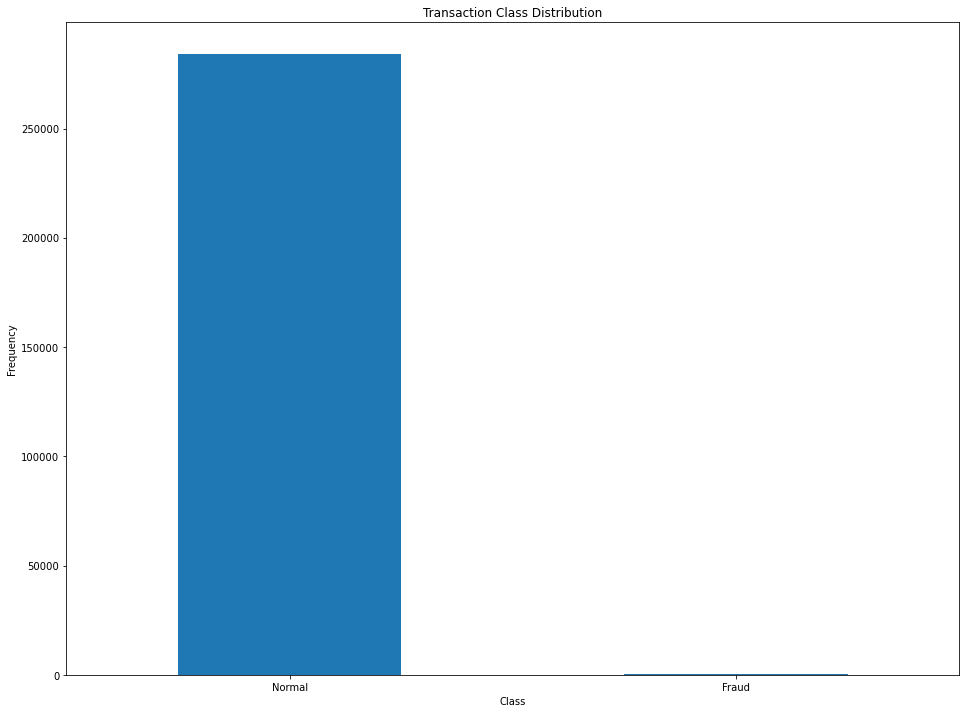

In [11]:
# EDA- Exploratory Data Analysis(for Visualization)
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [12]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [14]:
492+284315

284807

In [15]:
print(493/284807) #percentage of fraud happened

0.0017309967802757657


In [16]:
#Need to know howm may max and mimimum transactions in normal and fraud

In [17]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

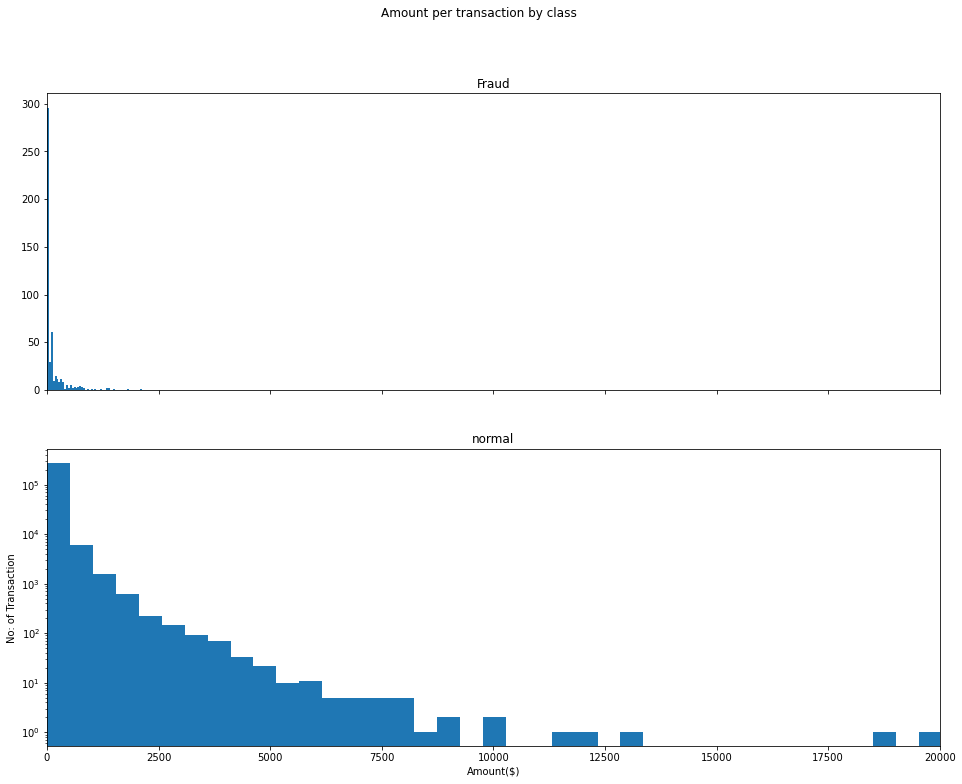

In [19]:
#for amount
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction by class")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount($)")
plt.ylabel("No: of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

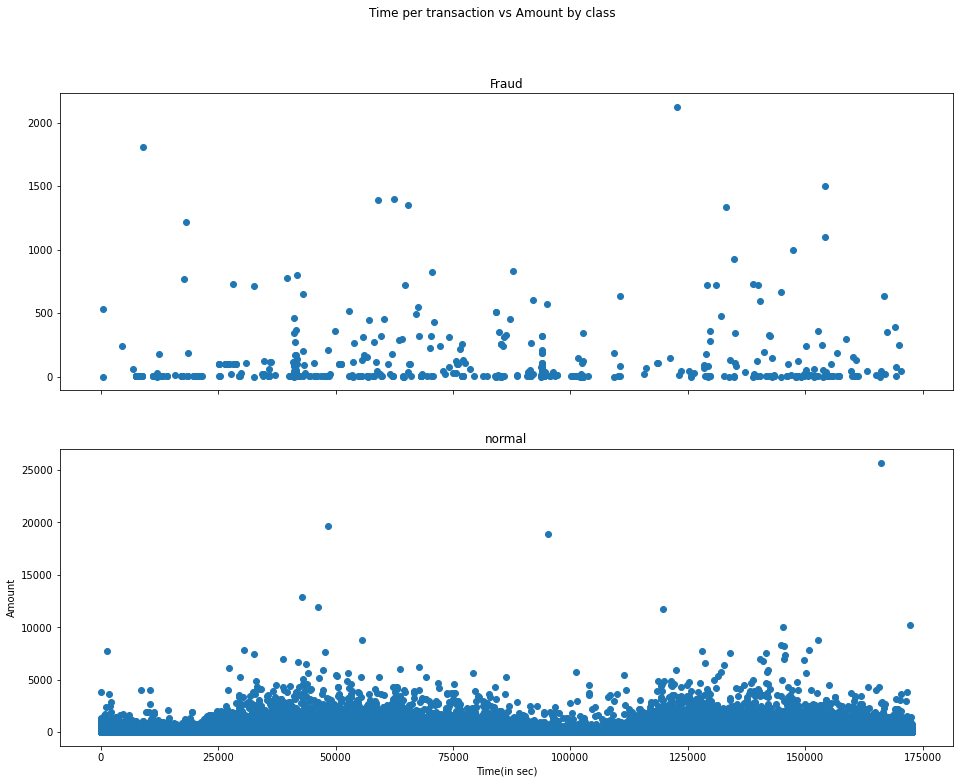

In [20]:
#for Time
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Time per transaction vs Amount by class")

ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time(in sec)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

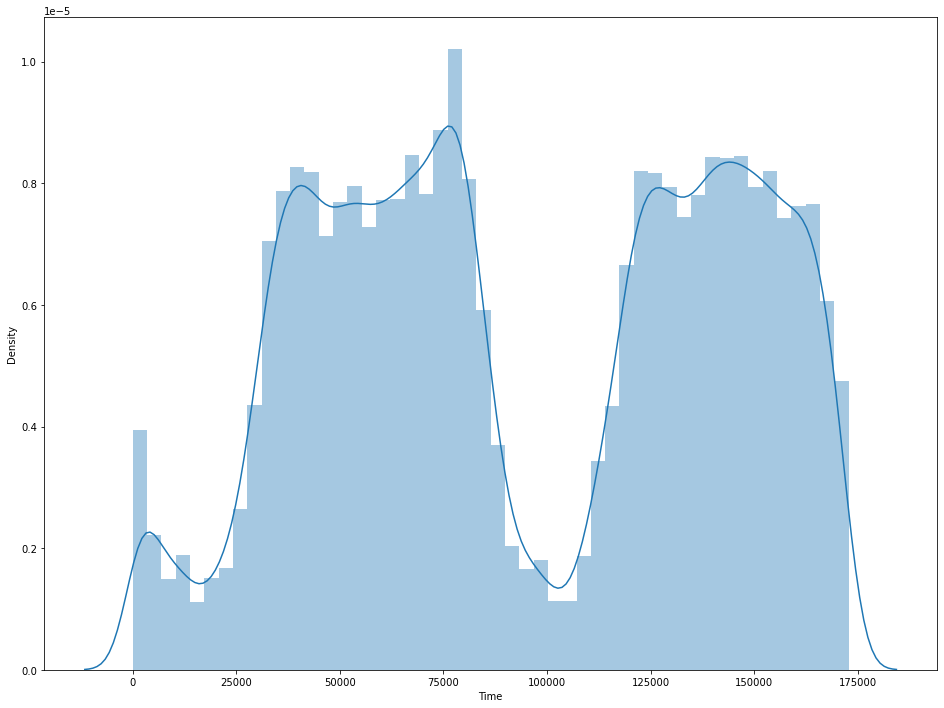

In [21]:
sns.distplot(data['Time'])#Umiform Distribution

In [22]:
len(data)

284807

In [23]:
#Taking 10%dataset to work with SVM as SVM wont work with huge dataset(where variables< no:of observations)

In [24]:
data1=data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

In [25]:
data1.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0


In [26]:
fraud=data1[data1['Class']==1]
valid=data1[data1['Class']==0]

In [27]:
print(fraud.shape)
print(valid.shape)

(49, 31)
(28432, 31)


In [28]:
outlier_fraction=len(fraud)/float(len(valid))

In [29]:
outlier_fraction

0.0017234102419808666

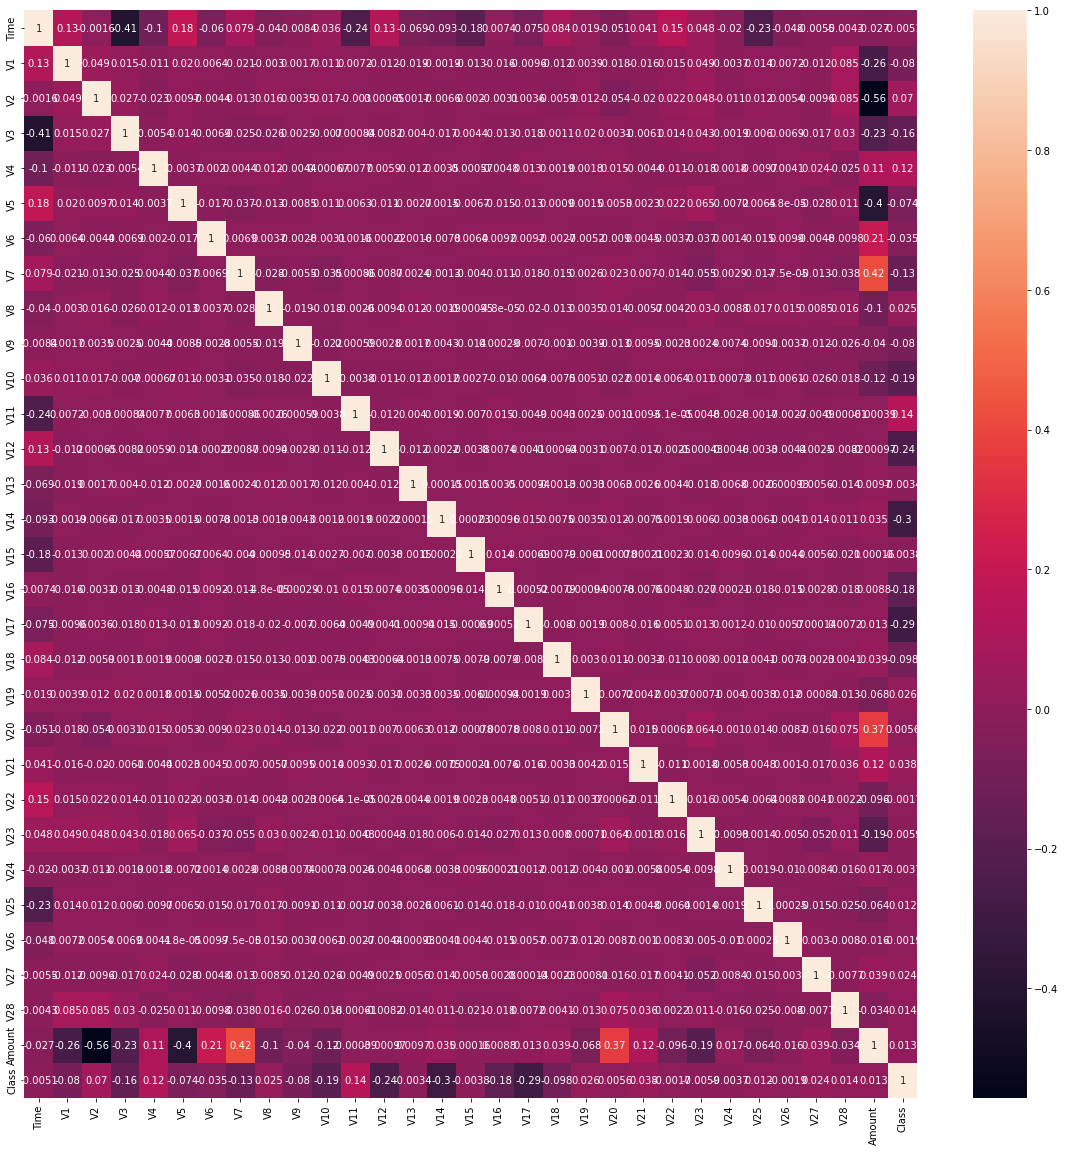

In [30]:
#Correlation part
#(to check wheteher + or - relation with dependent variable or not)
#to check any independent variable is related to any other indepenedent variable-multicollinearity so drop 1
#or to check Multicollinearity use VIF

cormat=data1.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data1[top_corr_feature].corr(),annot=True)

In [31]:
columns=data1.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [32]:
#Split the data into target variable and feature variables
#columns=data1.iloc[:,0:31]
#columns=data1.drop(['Class'],axis=1)
columns=[c for c in columns if c not in ['Class']]#we can use iloc or drop as well
target='Class'
state=np.random.RandomState(101)
x=data1[columns]
y=data1[target]
x_outlier=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
#uniform because we got uniform distribution in scatter plot
#we can isentify the fradulent datapoints and so we can give to Reserach and Dev or Reconsilation team
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [33]:
#Spit data into train and test fro bulding the model and from prediction

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=110)

In [35]:
x_train.shape

(19936, 30)

In [36]:
x_test.shape

(8545, 30)

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred_train=logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
print(classification_report(y_train,y_pred_train))
print('####'*20)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       0.63      0.56      0.59        34

    accuracy                           1.00     19936
   macro avg       0.82      0.78      0.80     19936
weighted avg       1.00      1.00      1.00     19936

################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.60      0.60      0.60        15

    accuracy                           1.00      8545
   macro avg       0.80      0.80      0.80      8545
weighted avg       1.00      1.00      1.00      8545



In [41]:
print(confusion_matrix(y_train,y_pred_train))
print('####'*20)
print(confusion_matrix(y_test,y_pred_test))

[[19891    11]
 [   15    19]]
################################################################################
[[8524    6]
 [   6    9]]


In [42]:
print(accuracy_score(y_train,y_pred_train))
print('####'*20)
print(accuracy_score(y_test,y_pred_test))

0.9986958266452648
################################################################################
0.9985956699824459


In [43]:
#For imbalance dataset Accuracy is  not a good parameter

In [44]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')#entropy works well with numbers as dep variable is numeric
#gini works well with char
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_pred_dt_train=dt.predict(x_train)
y_pred_dt_test=dt.predict(x_test)


In [46]:
print(classification_report(y_train,y_pred_dt_train))
print('####'*20)
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.88      0.47      0.61        15

    accuracy                           1.00      8545
   macro avg       0.94      0.73      0.80      8545
weighted avg       1.00      1.00      1.00      8545



In [47]:
print(confusion_matrix(y_train,y_pred_dt_train))
print('####'*20)
print(confusion_matrix(y_test,y_pred_dt_test))

[[19902     0]
 [    0    34]]
################################################################################
[[8529    1]
 [   8    7]]


In [48]:
print(accuracy_score(y_train,y_pred_dt_train))
print('####'*20)
print(accuracy_score(y_test,y_pred_dt_test))

1.0
################################################################################
0.9989467524868344


In [49]:
from sklearn import tree

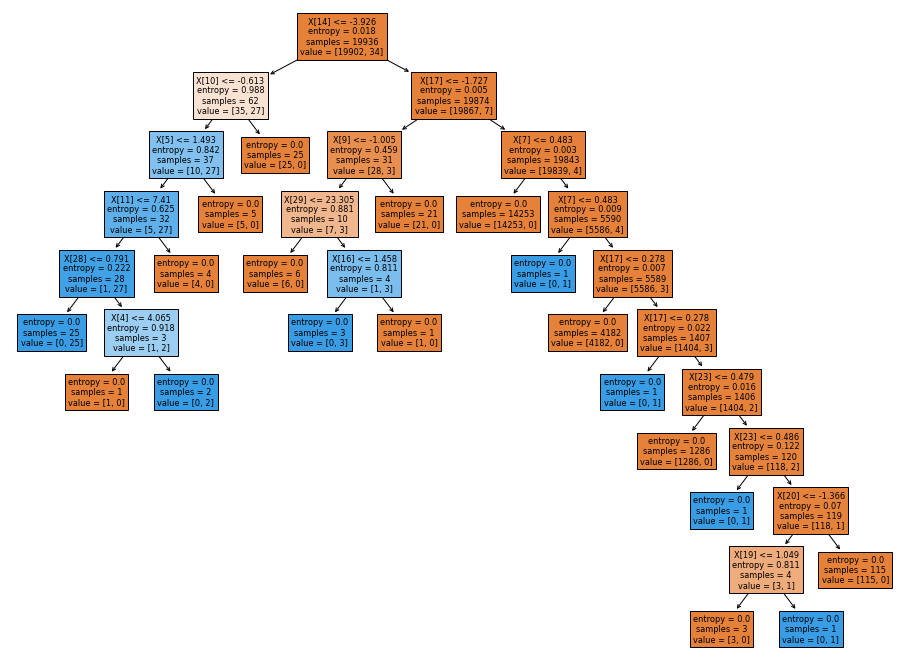

In [50]:
tree.plot_tree(dt,filled=True)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [52]:
y_pred_rfc_train=rfc.predict(x_train)
y_pred_rfc_test=rfc.predict(x_test)

In [53]:
print(accuracy_score(y_train,y_pred_rfc_train))
print('####'*20)
print(accuracy_score(y_test,y_pred_rfc_test))

1.0
################################################################################
0.9992978349912229


In [54]:
print(classification_report(y_train,y_pred_rfc_train))
print('####'*20)
print(classification_report(y_test,y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       1.00      0.60      0.75        15

    accuracy                           1.00      8545
   macro avg       1.00      0.80      0.87      8545
weighted avg       1.00      1.00      1.00      8545



In [55]:
#will go by RF as it is ensemble model
#When we have simple classification dataset-->Log Regression
#Sentimental Analysis-->Naive Bayes
#Clinical Sector-->KNN
#When automation things-->SVM


In [56]:
#XGboost

In [57]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)

In [59]:
print(accuracy_score(y_train,y_pred_xgb_train))
print('####'*20)
print(accuracy_score(y_test,y_pred_xgb_test))

1.0
################################################################################
0.9991808074897601


In [60]:
print(classification_report(y_train,y_pred_xgb_train))
print('####'*20)
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00        34

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.90      0.60      0.72        15

    accuracy                           1.00      8545
   macro avg       0.95      0.80      0.86      8545
weighted avg       1.00      1.00      1.00      8545



In [61]:
#Banking dtataset we need to do with Isolation forest(advanced version of RF),Local Outlier Forest

In [ ]:
#Stacking Classifier

In [62]:
!pip install mlxtend

In [64]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [65]:
from sklearn.model_selection import cross_val_score
clf1=KNeighborsClassifier(n_neighbors=5)
clf2=GaussianNB()
clf3=RandomForestClassifier()
clf4=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=clf4) #meta_classifier is the base model we want

print('3-fold cross validation: \n')
for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Naive Bayes Theorem','Random Forest','Stacking Classifier']):
    scores=cross_val_score(clf,x,y,cv=3,scoring='accuracy')
    print('Accuracy :%0.2f (+/-%0.2f)[%s]'%(scores.mean(),scores.std(),label))


3-fold cross validation: 

Accuracy :1.00 (+/-0.00)[KNN]
Accuracy :0.99 (+/-0.00)[Naive Bayes Theorem]
Accuracy :1.00 (+/-0.00)[Random Forest]
Accuracy :1.00 (+/-0.00)[Stacking Classifier]


In [66]:
#Isolation Forest,Local Outlier Factor

from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor

from sklearn.svm import OneClassSVM

In [68]:
Classification ={"Isolation Forest": IsolationForest(n_estimators=100,max_samples=len(x),contamination=outlier_fraction),
                 "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction),
                 "One Class SVM":OneClassSVM()
                 
                } #contamination is the fraudulent happens

In [ ]:
n_outliers=len(fraud)


for i ,(clf_name,clf) in enumerate(Classification.items()):
    if clf_name=='Local Outlier Factor' :
        y_pred=clf.fit_predict(x)
        score_prediction=clf.negative_outlier_factor_
    elif clf_name=="One Class SVM":
        clf.fit(x)
        y_pred=clf.predict(x)
            
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred=clf.predict(x)
            
    y_pred[y_pred==1] =0
    y_pred[y_pred==-1] =1
    n_error =(y_pred !=y).sum()
        
    print("{} : {}".format(clf_name,n_error))
    print('Accuracy Score:')
        
    print(accuracy_score(y,y_pred))
    print("Classification Report:")
    print(classification_report(y,y_pred))

Isolation Forest : 75
Accuracy Score:
0.9973666654962958
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor : 97
Accuracy Score:
0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

